# <span style= 'color:blue'> DETECTION DE CONTOUR  EXTRACTION DE CONTOUR (CETTE METHODE EFFICACE AVEC DARK BACKGROUND) : </span>
---

In [2]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

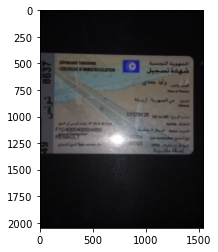

In [91]:
IMAGE_PATH = 'k.jpg'
img=cv2.imread(IMAGE_PATH)
plt.imshow(img)


#  <h2> <span style= 'color:noire'> 1-detection de differents contours(meilleurs avec elimination de noise dans l image)  : </span></h2>
---

In [92]:

img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#set a thresh
thresh = 100
#get threshold image
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


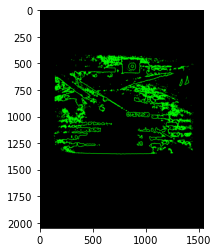

In [93]:
plt.imshow(img_contours)

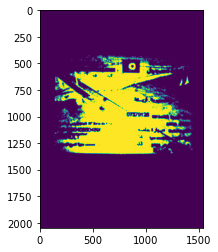

In [94]:
image2 = cv2.imread(IMAGE_PATH)
img_gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
ret, thresh2 = cv2.threshold(img_gray2, 100, 255, cv2.THRESH_BINARY)
plt.imshow(thresh2)

#  <h2> <span style= 'color:noire'> 2-RETR_HIEARARCHY to find contours   : </span></h2>
---

In [95]:
# contours3, hierarchy3 = cv2.findContours(thresh2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# image_copy4 = image2.copy()
# cv2.drawContours(image_copy4, contours3, -1, (0, 255, 0), 2, cv2.LINE_AA)
# # see the results
# cv2.imshow('LIST', image_copy4)
# print(f"LIST: {hierarchy3}")
# cv2.waitKey(0)
# cv2.imwrite('contours_retr_list.jpg', image_copy4)
# cv2.destroyAllWindows()

In [96]:
contours4, hierarchy4 = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
image_copy5 = image2.copy()
cv2.drawContours(image_copy5, contours4, -1, (0, 255, 0), 2, cv2.LINE_AA)
# see the results
cv2.imshow('EXTERNAL', image_copy5)
print(f"EXTERNAL: {hierarchy4}")
cv2.waitKey(0)
cv2.imwrite('contours_retr_external.jpg', image_copy5)
cv2.destroyAllWindows()

EXTERNAL: [[[   1   -1   -1   -1]
  [   2    0   -1   -1]
  [   3    1   -1   -1]
  ...
  [1788 1786   -1   -1]
  [1789 1787   -1   -1]
  [  -1 1788   -1   -1]]]


In [97]:
contours4[0][0][0]

array([1062, 1348], dtype=int32)

#  <h2> <span style= 'color:noire'> 3-extraction des coordonnes  contours select max min axe x et y      : </span></h2>
---

In [98]:
x, y = [], []

for contour_line in contours:
    for contour in contour_line:
        x.append(contour[0][0])
        y.append(contour[0][1])

x1, x2, y1, y2 = min(x), max(x), min(y), max(y)
print(x1,x2,' ',y1,y2)

cropped = img[y1:y2, x1:x2]

132 1433   423 1354


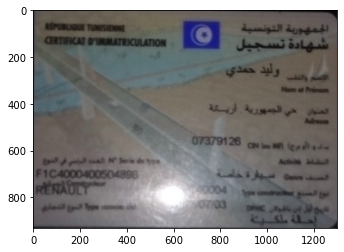

In [99]:
plt.imshow(cropped)